In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
halos = {}
halos['lcdm'] = np.load('Trial_PP_halo_catalog_2048Mpc_n4096_M13.npy')
halos['m26'] = np.load('Trial_PP_halo_catalog_2048Mpc_n4096_1_26_10_M13.npy')
halos['m25'] = np.load('Trial_PP_halo_catalog_2048Mpc_n4096_1_25_10_M13.npy')
halos['m24'] = np.load('Trial_PP_halo_catalog_2048Mpc_n4096_1_24_10_M13.npy')
halos['m23'] = np.load('Trial_PP_halo_catalog_2048Mpc_n4096_1_23_10_M13.npy')

In [3]:
voids = {}
voids['lcdm'] = np.loadtxt('2048Mpc_n4096_M13zobov-Voids_cat.txt', dtype=np.float32)
voids['m26'] = np.loadtxt('2048Mpc_n4096_1_26_10_M13zobov-Voids_cat.txt', dtype=np.float32)
voids['m25'] = np.loadtxt('2048Mpc_n4096_1_25_10_M13zobov-Voids_cat.txt', dtype=np.float32)
voids['m24'] = np.loadtxt('2048Mpc_n4096_1_24_10_M13zobov-Voids_cat.txt', dtype=np.float32)
voids['m23'] = np.loadtxt('2048Mpc_n4096_1_23_10_M13zobov-Voids_cat.txt', dtype=np.float32)

In [4]:
hx = {}
hy = {}
hz = {}

vx = {}
vy = {}
vz = {}
vR = {}
vdelmin = {}

for K in halos.keys():
    hx[K], hy[K], hz[K] = halos[K][:, :3].T + 1024 * .68
    vx[K] = (voids[K][:,1]-1024*.68)%(2048*.68)
    vy[K] = (voids[K][:,2]-1024*.68)%(2048*.68)
    vz[K] = (voids[K][:,3]-1024*.68)%(2048*.68)
    vR[K] = voids[K][:,4]
    vdelmin[K] = voids[K][:,5]

In [5]:
from scipy.spatial import KDTree

In [6]:
#tree = KDTree(np.array([hx['lcdm'], hy['lcdm'], hz['lcdm']]).T, boxsize=2048*.68)
#tree_v = KDTree(np.array([vx['lcdm'], vy['lcdm'], vz['lcdm']]).T, boxsize=2048*.68)

In [7]:
np.argmin(np.abs(vR['lcdm']-20))

9863

In [8]:
vR['lcdm']

array([68.259, 72.592, 63.757, ..., 11.441,  8.836,  9.835], dtype=float32)

In [9]:
#plt.scatter(hx['lcdm'][ind_of_halos_in_voids], hy['lcdm'][ind_of_halos_in_voids])
#plt.scatter(vx['lcdm'][], vy['lcdm'][])

In [47]:
def ellipticity(key, index, tree):
    """
    Using eqns from: Precision cosmology with voids
    """
    I = np.zeros((3, 3))
    
    halos_in_void = tree.query_ball_point([vx[key][index], 
                                               vy[key][index], 
                                               vz[key][index]], 
                                              vR[key][index],)
    if len(halos_in_void) < 5:
        return 0.
    
    center = np.array([vx[key][index], vy[key][index], vz[key][index]])
    halo_pos = np.array([hx[key], hy[key], hz[key]]).T - center 
    
    for alpha in halos_in_void:
        #I += np.outer(halo_pos[alpha], halo_pos[alpha])
        I[0][0] += halo_pos[alpha][1]**2 + halo_pos[alpha][2]**2
        I[1][1] += halo_pos[alpha][0]**2 + halo_pos[alpha][2]**2
        I[2][2] += halo_pos[alpha][0]**2 + halo_pos[alpha][1]**2
        
        I[0][1] -= halo_pos[alpha][0] * halo_pos[alpha][1]
        I[0][2] -= halo_pos[alpha][0] * halo_pos[alpha][2]
        I[1][2] -= halo_pos[alpha][1] * halo_pos[alpha][2]
        
    I[1][0] = I[0][1]
    I[2][0] = I[0][2]
    I[2][1] = I[1][2]
    
    #print(len(halos_in_void))
    #I /= len(halos_in_void)
    
    I1, I2, I3 = np.sort(np.linalg.eig(I)[0])[::-1] # I3 largest
    
    #if np.min([I1, I2, I3]) < 0:
    #    return 0
    
    epsilon = 1 - (((I2+I3-I1) / (I1+I2-I3)))**.25
    
    #epsilon = 1 - (I1/I3)**.25
    
    return epsilon

In [11]:
tree = KDTree(np.array([hx['lcdm'], hy['lcdm'], hz['lcdm']]).T, boxsize=2048*.68)


    
#plt.hist(e[e>0], bins=np.linspace(0, 1, 31), density=True, histtype='step')
'''
tree = KDTree(np.array([hx['m26'], hy['m26'], hz['m26']]).T, boxsize=2048*.68)

e = np.zeros(200)
for i in range(200):
    e[i] = ellipticity('m26', -i, tree)
    
plt.hist(e[e>0], bins=np.linspace(0, 1, 31), density=True, histtype='step')'''

"\ntree = KDTree(np.array([hx['m26'], hy['m26'], hz['m26']]).T, boxsize=2048*.68)\n\ne = np.zeros(200)\nfor i in range(200):\n    e[i] = ellipticity('m26', -i, tree)\n    \nplt.hist(e[e>0], bins=np.linspace(0, 1, 31), density=True, histtype='step')"

In [12]:
tree_m26 = KDTree(np.array([hx['m26'], hy['m26'], hz['m26']]).T, boxsize=2048*.68)

In [48]:
e = np.zeros(len(vR['lcdm'][vR['lcdm']<50]))
for i in range(len(vR['lcdm'][vR['lcdm']<50])):
    e[i] = ellipticity('lcdm', i, tree)

2144

In [44]:
e_26 = np.zeros(len(vR['m26'][vR['m26']<50]))
for i in range(len(vR['m26'][vR['m26']<50])):
    e_26[i] = ellipticity('m26', i, tree_m26)

<ErrorbarContainer object of 3 artists>

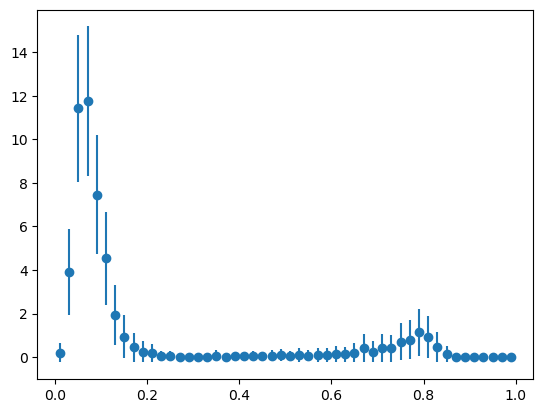

In [15]:
Nbins = 50
bin_cens = np.array([(np.linspace(0, 1, Nbins+1)[i+1]+np.linspace(0, 1, Nbins+1)[i])/2 for i in range(Nbins)])
hist_cdm = np.histogram(e[e>0], bins=np.linspace(0, 1, Nbins+1), density=True)[0]
plt.errorbar(bin_cens, hist_cdm, yerr=np.sqrt(hist_cdm), fmt='o')

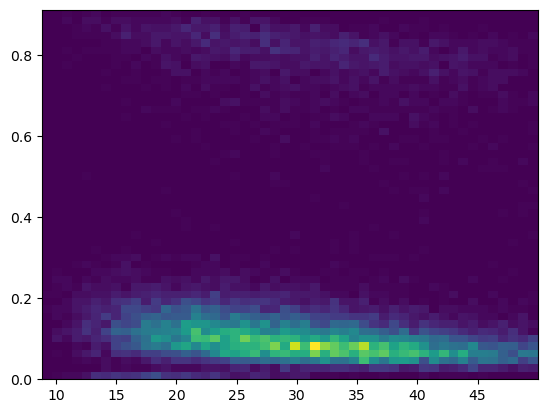

In [32]:
plt.hist2d(vR['lcdm'][vR['lcdm']<50], e, bins=50);

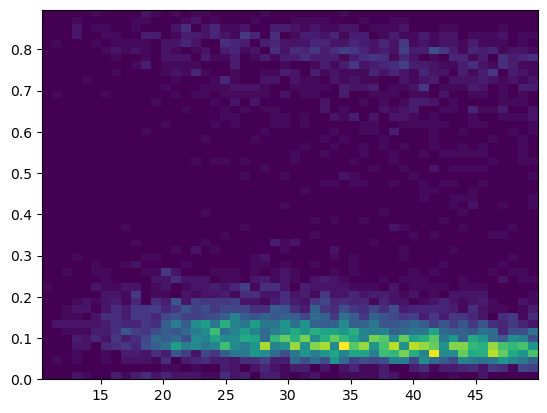

In [33]:
plt.hist2d(vR['m26'][vR['m26']<50], e_26, bins=50);

(0.0, 1.0)

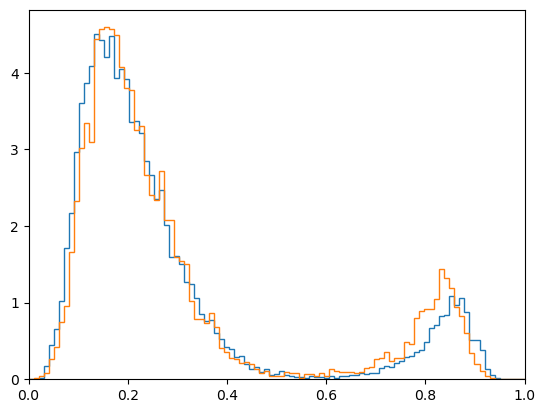

In [53]:
plt.hist(e[e>0], bins=np.linspace(0, 1, 100), histtype='step', density=True);
plt.hist(e_26[e_26>0], bins=np.linspace(0, 1, 100), histtype='step', density=True);
plt.xlim(0, 1)

In [42]:
e_26

array([-0.08424332, -0.26419282, -0.08203576, ..., -0.09412369,
       -0.24251717, -3.26797989])

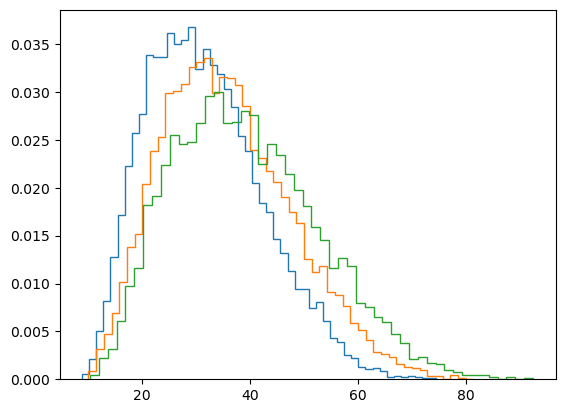

In [38]:
plt.hist(vR['lcdm'], bins=50, histtype='step', density=True);
plt.hist(vR['m25'], bins=50, histtype='step', density=True);
plt.hist(vR['m26'], bins=50, histtype='step', density=True);

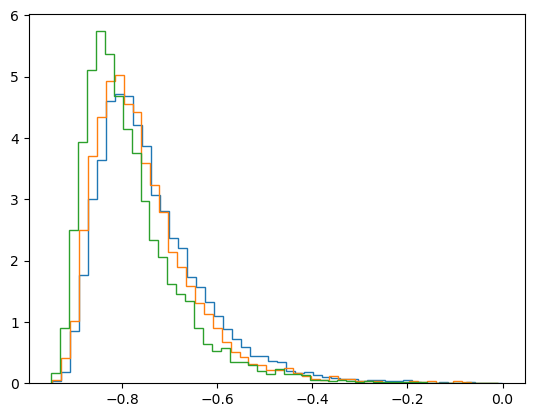

In [51]:
plt.hist(vdelmin['lcdm'], bins=50, histtype='step', density=True);
plt.hist(vdelmin['m25'], bins=50, histtype='step', density=True);
plt.hist(vdelmin['m26'], bins=50, histtype='step', density=True);

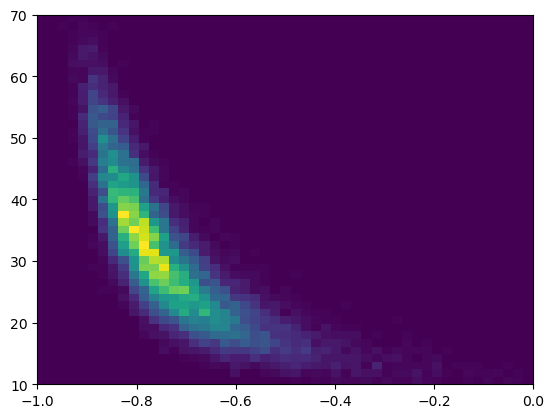

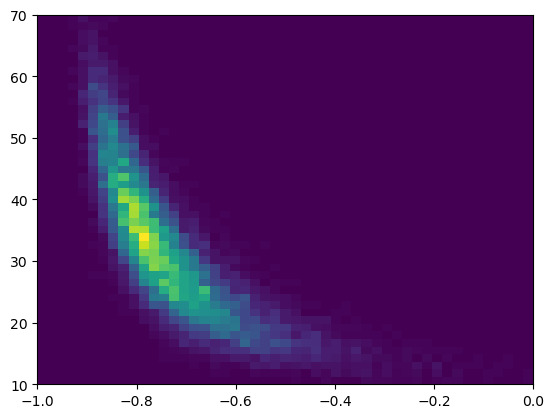

In [54]:
plt.hist2d(vdelmin['lcdm'], vR['lcdm'], bins=(np.linspace(-1, 0, 50), np.linspace(10, 70, 50)));
plt.show()
plt.hist2d(vdelmin['m24'], vR['m24'], bins=(np.linspace(-1, 0, 50), np.linspace(10, 70, 50)));

In [56]:
def P_lambdas(l1, l2, l3, sigma):
    
    K1 = l1+l2+l3
    K2 = l1*l3+l1*l2*l2*l3
    
    out = np.abs((l1-l2)*(l1-l3)*(l2-l3))
    out *= np.exp(3*(2*K1**2-5*K2)/2/sigma**2)
    out *= 3375/8/np.sqrt(5)/sigma**6/np.pi
    
    return out

def P_munudel(mu, delta, nu, sigma):
    
    den = (1+mu**2+nu**2)
    l1 = -(1+mu**2-2*nu**2+delta*nu**2) / den
    l2 = -(1-2*mu**2+delta*mu**2+nu**2) / den
    l3 = -(-2+delta+mu**2+nu**2) / den
    
    out = P_lambdas(l1, l2, l3, sigma)
    
    out *= 4*(delta-3)**3*mu*nu / den**3
    
    return out


def P_nu(epsilon, delta, sigma):
    
    #mu_array = np.linspace(nu, 1, 1000)
    #I1 = np.trapz(P_munudel(mu_array, -0.9, nu, sigma), mu_array, axis=0)
    
    #I2 = np.trapz(I1, delta_array, axis=0)
    #nu_array = np.linspace(-1, 1, 1000)
    
    #I2 = [np.trapz(P_munudel(nu_array[i], -0.9, nu_array, sigma), nu_array, axis=0) for i in range(1000)]
    
    #I1 = np.trapz(vals, mu_array, axis=0)
    #I2 = np.trapz(I1, delta_array, axis=0)
    
    nu = 1-epsilon
    
    mu = np.linspace(nu, 1, 1000)
    
    den = (1+mu**2+nu**2)
    l1 = -(1+mu**2-2*nu**2+delta*nu**2) / den
    l2 = -(1-2*mu**2+delta*mu**2+nu**2) / den
    
    out = 3375 * np.sqrt(2)/np.sqrt(10*np.pi)/sigma**5
    out *= np.exp(-15*(l1**2+l1*l2+l2**2)/2/sigma**2)
    out *= np.exp(-5*delta**2/2/sigma**2+15*delta*(l1+l2)/2/sigma**2)
    out *= (2*l1+l2-delta) * (l1-l2) * (l1+2*l2-delta)
    out *= 4*(delta-3)**3*mu*nu / den**3
    
    integral = np.trapz(out, mu)
    
    return integral

In [57]:
from scipy.integrate import dblquad, trapz, tplquad

In [58]:
P_array = np.array([P_nu(x, -0.9, 10) for x in np.linspace(0, 1, 1000)])

In [59]:
A = np.trapz(P_array, np.linspace(0, 1, 1000))

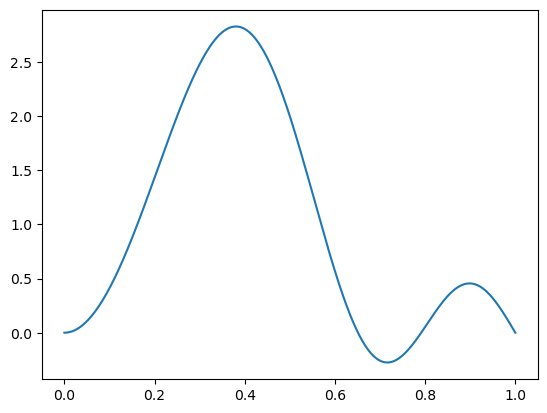

In [60]:
plt.plot(np.linspace(0, 1, 1000), P_array/A)

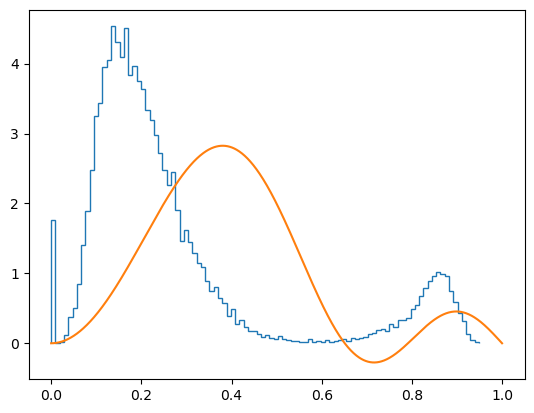

In [61]:
plt.hist(e, bins=100, histtype='step', density=True);
plt.plot(np.linspace(0, 1, 1000), P_array/A)